In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
path = 'KPMG_VI_New_raw_data.xlsx'

#### Prepare CustomerDemographic table

In [4]:
demog = pd.read_excel(path, sheet_name='CustomerDemographic')
demog.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [82]:
demog_copy = demog.copy()
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [83]:
demog_copy['gender'].unique().tolist()

['F', 'Male', 'Female', '247', 'U', 'Femal', 'M']

In [84]:
# we will replace all 'F', 'Femal' to be 'Female'
# we will replace all 'M' to be 'Male'
demog_copy['gender'].replace({'F' : 'Female', 'Femal' : 'Female', 'M' : 'Male'}, inplace=True)
demog_copy.gender.unique()

array(['Female', 'Male', '247', 'U'], dtype=object)

In [85]:
demog_copy.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [86]:
# create age variable out of DOB
demog_copy['age'] = demog_copy['DOB'].map(lambda x: x.year)
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0


In [87]:
# change the years in 'age' to age values in number of years
# dividing it by the year 2018 as we assume to be analysing for the year 2018
demog_copy['age'] = 2018 - demog_copy['age']
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,65.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,38.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,57.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,41.0


In [88]:
demog_copy.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,40.969333
std,1154.844867,28.715005,5.660146,12.796387
min,1.000000,0.000000,1.000000,16.000000
25%,1000.750000,24.000000,6.000000,31.000000
50%,2000.500000,48.000000,11.000000,41.000000
75%,3000.250000,73.000000,15.000000,50.000000
max,4000.000000,99.000000,22.000000,175.000000


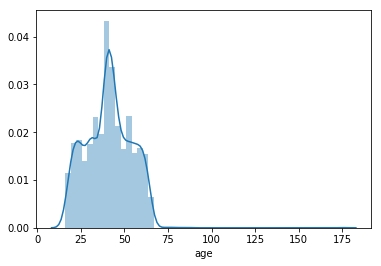

In [89]:
sns.distplot(demog_copy['age'].dropna())

In [90]:
# replace all values of age older than 75 years old
for i in demog_copy['age']:
    if i > 75:
        demog_copy['age'].replace(to_replace=i, value=np.nan, inplace=True)
demog_copy.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3909.000000
mean,2000.500000,48.890000,10.657041,40.903044
std,1154.844867,28.715005,5.660146,12.568566
min,1.000000,0.000000,1.000000,16.000000
25%,1000.750000,24.000000,6.000000,31.000000
50%,2000.500000,48.000000,11.000000,41.000000
75%,3000.250000,73.000000,15.000000,50.000000
max,4000.000000,99.000000,22.000000,75.000000


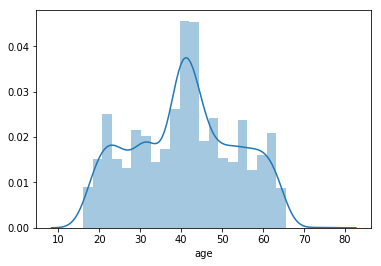

In [91]:
sns.distplot(demog_copy['age'].dropna())

In [92]:
# create age group variable of 16-19 teen, 20-29 young adult, 30-50 adult, 51-64 elder, 65-80 senior
bins = [16, 20, 30, 51, 65, 75]
labels = ['Teen', 'Young Adult', 'Adult', 'Elder', 'Senior']
demog_copy['age_group'] = pd.cut(demog_copy['age'], bins=bins, labels=labels, right=False)
demog_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,65.0,Senior
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,38.0,Adult
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0,Elder
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,57.0,Elder
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,41.0,Adult


##### check this out later, to get more insight with age and profit
sns.boxplot(x='deceased_indicator', y='age', data=demog_copy)

In [93]:
demog_copy['gender'].replace({'247' : np.nan, 'U' : np.nan}, inplace=True)
demog_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 3911 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
age                                    3909 non-null float64
age_group                              3908 non-null category
dtypes: category(1), datetime64[ns](1), flo

#### Prepare the customer address table

In [5]:
addr = pd.read_excel(path, sheet_name='CustomerAddress')

In [102]:
addr_copy = addr.copy()
addr_copy.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,0 Holy Cross Court,4211,QLD,Australia,9
3,4,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,9 Oakridge Court,3216,VIC,Australia,9


In [103]:
addr_copy['state'].unique().tolist()

['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria']

In [104]:
addr_copy.replace({'New South Wales' : 'NSW', 'Victoria' : 'VIC'}, inplace=True)
set(addr_copy.state)

{'NSW', 'QLD', 'VIC'}

In [105]:
# concatenate demographic and address together
customers = pd.concat([demog_copy, addr_copy.iloc[:, 1:6]], axis=1)
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,65.0,Senior,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,38.0,Adult,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0,Elder,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,57.0,Elder,17979 Del Mar Point,2448,NSW,Australia,4
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,41.0,Adult,9 Oakridge Court,3216,VIC,Australia,9


In [106]:
# pull out needed attributes for analysis
cust_attr = ['customer_id', 'gender', 'wealth_segment', 'age', 'age_group', 'state']
cust_analysis_data = customers.loc[:, cust_attr].dropna()
cust_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3999
Data columns (total 6 columns):
customer_id       3907 non-null int64
gender            3907 non-null object
wealth_segment    3907 non-null object
age               3907 non-null float64
age_group         3907 non-null category
state             3907 non-null object
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 187.2+ KB


#### Prepare the transaction table

In [6]:
trans = pd.read_excel(path, sheet_name='Transactions')

In [108]:
trans_copy = trans.copy()
trans_copy.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [109]:
trans_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19802 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [110]:
trans_copy['brand'].unique().tolist()

['OHM Cycles',
 'Solex',
 'Trek Bicycles',
 'Norco Bicycles',
 'Giant Bicycles',
 'WeareA2B',
 nan]

In [111]:
trans_copy['product_line'].unique().tolist()

['Standard', 'Road', 'Mountain', 'Touring', nan]

In [112]:
trans_copy['product_class'].unique().tolist()

['medium', 'low', 'high', nan]

In [113]:
trans_copy['order_status'].unique().tolist()

['Approved', 'Cancelled']

In [114]:
# pull out all approved transactions
# subset the product types and perform analysis on them
prod_attr = ['customer_id', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost']
trans_approved = trans_copy.loc[trans_copy['order_status']=='Approved', prod_attr].dropna()
trans_approved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19625 entries, 0 to 19999
Data columns (total 7 columns):
customer_id      19625 non-null int64
brand            19625 non-null object
product_line     19625 non-null object
product_class    19625 non-null object
product_size     19625 non-null object
list_price       19625 non-null float64
standard_cost    19625 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ MB


In [136]:
# merge customers and approved transactions table together
cust_trans_appr = pd.merge(cust_analysis_data,
                           trans_approved,
                           on='customer_id',
                           how='inner')
cust_trans_appr.head()

,customer_id,gender,wealth_segment,age,age_group,state,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,Female,Mass Customer,65.0,Senior,NSW,OHM Cycles,Standard,medium,medium,235.63,125.07
1,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,1577.53,826.51
2,1,Female,Mass Customer,65.0,Senior,NSW,Trek Bicycles,Road,low,small,1720.70,1531.42
3,1,Female,Mass Customer,65.0,Senior,NSW,Norco Bicycles,Standard,medium,medium,360.40,270.30
4,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,71.49,53.62


In [137]:
cust_trans_appr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 12 columns):
customer_id       19147 non-null int64
gender            19147 non-null object
wealth_segment    19147 non-null object
age               19147 non-null float64
age_group         19147 non-null category
state             19147 non-null object
brand             19147 non-null object
product_line      19147 non-null object
product_class     19147 non-null object
product_size      19147 non-null object
list_price        19147 non-null float64
standard_cost     19147 non-null float64
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 1.8+ MB


In [138]:
# create profit variable by subtracting standard_cost from list_price
cust_trans_appr['product_profit'] = cust_trans_appr['list_price'] - cust_trans_appr['standard_cost']
cust_trans_appr.head()

,customer_id,gender,wealth_segment,age,age_group,state,brand,product_line,product_class,product_size,list_price,standard_cost,product_profit
0,1,Female,Mass Customer,65.0,Senior,NSW,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56
1,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,1577.53,826.51,751.02
2,1,Female,Mass Customer,65.0,Senior,NSW,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28
3,1,Female,Mass Customer,65.0,Senior,NSW,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10
4,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,71.49,53.62,17.87


In [129]:
cust_trans_appr.to_csv('cust_trans_appr.csv', index=False)

In [162]:
cust_trans_appr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 13 columns):
customer_id       19147 non-null int64
gender            19147 non-null object
wealth_segment    19147 non-null object
age               19147 non-null float64
age_group         19147 non-null category
state             19147 non-null object
brand             19147 non-null object
product_line      19147 non-null object
product_class     19147 non-null object
product_size      19147 non-null object
list_price        19147 non-null float64
standard_cost     19147 non-null float64
product_profit    19147 non-null float64
dtypes: category(1), float64(4), int64(1), object(7)
memory usage: 2.5+ MB


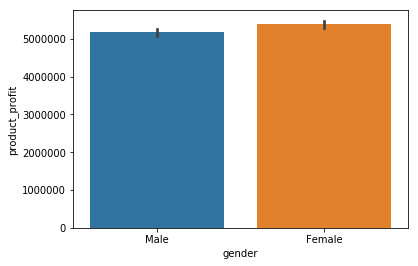

In [148]:
# gender against profit
sns.barplot(x='gender', y='product_profit', data=cust_trans_appr, estimator=sum, order=['Male', 'Female'])
plt.show()

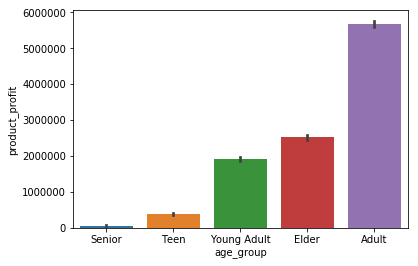

In [147]:
# age group against profit
sns.barplot(x='age_group', y='product_profit', data=cust_trans_appr, estimator=sum, order=['Senior', 'Teen', 'Young Adult', 'Elder', 'Adult'])
plt.show()

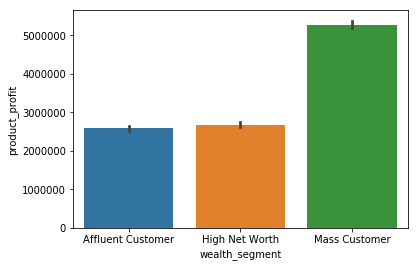

In [150]:
# wealth segment against profit
sns.barplot(x='wealth_segment', y='product_profit', data=cust_trans_appr, estimator=sum, order=['Affluent Customer', 'High Net Worth', 'Mass Customer'])
plt.show()

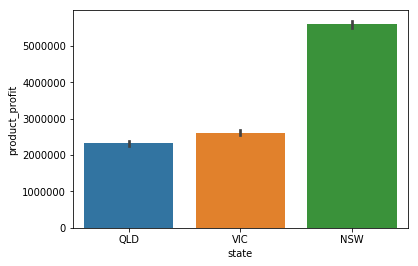

In [152]:
# state segment against profit
sns.barplot(x='state', y='product_profit', data=cust_trans_appr, estimator=sum, order=['QLD', 'VIC', 'NSW'])
plt.show()

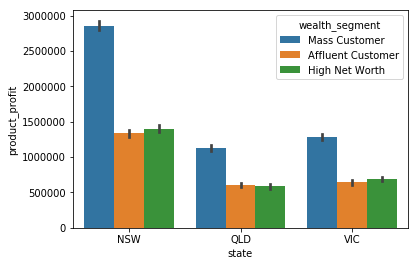

In [156]:
# state and wealth segment against profit
sns.barplot(x='state', y='product_profit', hue='wealth_segment', data=cust_trans_appr, estimator=sum)
plt.show()

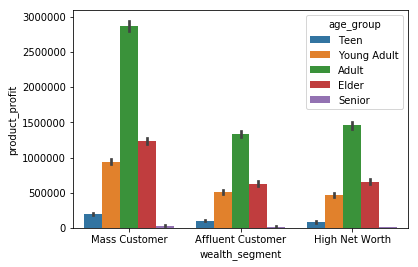

In [157]:
# wealth segment and age group against profit
sns.barplot(x='wealth_segment', y='product_profit', hue='age_group', data=cust_trans_appr, estimator=sum)
plt.show()

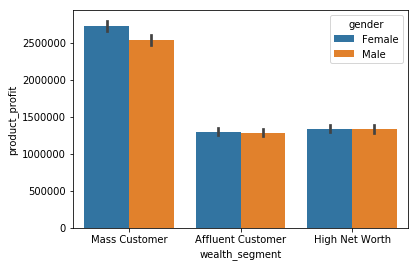

In [159]:
# wealth segment and age group against profit
sns.barplot(x='wealth_segment', y='product_profit', hue='gender', data=cust_trans_appr, estimator=sum)
plt.show()

**I had to move visualization to Tableau as Seaborn doesn't support using multiple variables in its 'hue' parameter**

### Estimating population mean difference between the two best 4-factor demograpics, using confidence interval with a 95% confidence level.

In [164]:
cust_trans_appr.head()

,customer_id,gender,wealth_segment,age,age_group,state,brand,product_line,product_class,product_size,list_price,standard_cost,product_profit
0,1,Female,Mass Customer,65.0,Senior,NSW,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56
1,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,1577.53,826.51,751.02
2,1,Female,Mass Customer,65.0,Senior,NSW,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28
3,1,Female,Mass Customer,65.0,Senior,NSW,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10
4,1,Female,Mass Customer,65.0,Senior,NSW,Solex,Standard,medium,medium,71.49,53.62,17.87


In [165]:
# to subset the data that contain the top 2 overall demographics - NSW-Mass Customer-Adult-Females/Males
keep = ['customer_id', 'gender', 'wealth_segment', 'age', 'age_group', 'state', 'product_profit']
nsw = cust_trans_appr.loc[cust_trans_appr['state']=='NSW', keep]
set(nsw.state)

{'NSW'}

In [167]:
nsw_mass = nsw.loc[nsw['wealth_segment']=='Mass Customer', keep]
set(nsw_mass['wealth_segment'])

{'Mass Customer'}

In [169]:
nsw_mass_adult = nsw_mass.loc[nsw_mass.age_group=='Adult', keep]
nsw_mass_adult['age_group'].unique()

[Adult]
Categories (1, object): [Adult]

In [208]:
nsw_mass_adult_male = nsw_mass_adult.loc[nsw_mass_adult['gender']=='Male', keep]
nsw_mass_adult_female = nsw_mass_adult.loc[nsw_mass_adult['gender']=='Female', keep]
nsw_mass_adult_male.head()

,customer_id,gender,wealth_segment,age,age_group,state,product_profit
11,2,Male,Mass Customer,38.0,Adult,NSW,448.68
12,2,Male,Mass Customer,38.0,Adult,NSW,547.28
13,2,Male,Mass Customer,38.0,Adult,NSW,1230.30
82,16,Male,Mass Customer,41.0,Adult,NSW,1702.55
83,16,Male,Mass Customer,41.0,Adult,NSW,641.64


In [209]:
nsw_mass_adult_female.head()

,customer_id,gender,wealth_segment,age,age_group,state,product_profit
143,26,Female,Mass Customer,40.0,Adult,NSW,129.01
144,26,Female,Mass Customer,40.0,Adult,NSW,139.23
158,29,Female,Mass Customer,50.0,Adult,NSW,471.60
159,29,Female,Mass Customer,50.0,Adult,NSW,139.23
160,29,Female,Mass Customer,50.0,Adult,NSW,75.48


In [175]:
nsw_mass_adult_male.describe()

,customer_id,age,product_profit
count,1317.000000,1317.000000,1317.000000
mean,1755.646925,40.018223,555.673386
std,1069.791694,5.360383,490.267191
min,2.000000,30.000000,4.800000
25%,757.000000,37.000000,139.230000
50%,1665.000000,40.000000,445.210000
75%,2691.000000,43.000000,827.160000
max,3499.000000,50.000000,1702.550000


In [181]:
ma_mean = 555.673386
s1 = 490.267191
n1 = len(nsw_mass_adult_male)

In [182]:
fe_mean = 547.298481
s2 = 492.317942
n2 = len(nsw_mass_adult_female)

In [183]:
mean_diff = ma_mean - fe_mean
t_star = 1.98
se = np.sqrt((((n1-1) * s1**2) + ((n2-1) * s2**2)) / (n1 + n2 - 2)) * np.sqrt((1 / n1) + (1 / n2))

In [184]:
se

18.24973196658795

In [187]:
lcb = mean_diff - t_star * se
ucb = mean_diff + t_star * se
lcb, ucb

(-27.75956429384413, 44.509374293844154)

In [186]:
from statsmodels.stats.weightstats import zconfint
#statsmodels.stats.weightstats.zconfint

In [188]:
# Using statsmodel
zconfint(x1=nsw_mass_adult_male['product_profit'], x2=nsw_mass_adult_female['product_profit'], usevar='pooled')

(-27.393911986527073, 44.14372277312678)

# PREDICTIVE MODELING

### Data preparation on a copy of the data

In [7]:
demog_cop = demog.copy()
addr_cop = addr.copy()
demog_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 375.1+ KB


In [8]:
# concatenate demographic and address together
customers = pd.concat([demog_cop, addr_cop.iloc[:, 1:6]], axis=1)
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
trans_cop = trans.copy()

In [10]:
# removed cancelled transactions from the transactions table
to_keep = ['customer_id', 'list_price', 'standard_cost', 'order_status']
trans_cop_approved = trans_cop.loc[trans_cop['order_status']=='Approved', to_keep]
trans_cop_approved.head()

,customer_id,list_price,standard_cost,order_status
0,1,235.63,125.07,Approved
1,1,1577.53,826.51,Approved
2,1,1720.70,1531.42,Approved
3,1,360.40,270.30,Approved
4,1,71.49,53.62,Approved


In [11]:
# create profit variable
trans_cop_approved['profit'] = trans_cop_approved['list_price'] - trans_cop_approved['standard_cost']

In [12]:
# to add up profit of each customer_id from the transaction table to the customers table
profit = []
for ID in customers['customer_id']:
    prof = trans_cop_approved.loc[trans_cop_approved['customer_id'] == ID, 'profit'].sum()
    profit.append(prof)
    
customers['profit'] = profit
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,3018.09
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,2226.26
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0 Holy Cross Court,4211,QLD,Australia,9,3362.81
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,17979 Del Mar Point,2448,New South Wales,Australia,4,220.57
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,9 Oakridge Court,3216,VIC,Australia,9,2394.94


In [238]:
# save the dataset to local machine
customers.to_csv('customer_wprofit.csv', index=False)

In [13]:
# we have to remove some customer observations in this case. They don't have a value in the target variable which we can't impute
customers_that_bought = customers.loc[customers['profit'] > 0, ]
customers_that_bought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3499
Data columns (total 18 columns):
customer_id                            3492 non-null int64
first_name                             3492 non-null object
last_name                              3380 non-null object
gender                                 3492 non-null object
past_3_years_bike_related_purchases    3492 non-null int64
DOB                                    3416 non-null datetime64[ns]
job_title                              3069 non-null object
job_industry_category                  2931 non-null object
wealth_segment                         3492 non-null object
deceased_indicator                     3492 non-null object
owns_car                               3492 non-null object
tenure                                 3416 non-null float64
address                                3492 non-null object
postcode                               3492 non-null int64
state                                  3492 non

### EDA

In [240]:
customers_that_bought.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,profit
count,3492.000000,3492.000000,3416.000000,3492.000000,3492.000000,3492.000000
mean,1750.335052,48.808706,10.684426,2988.786655,7.516323,3101.728107
std,1010.362109,28.600240,5.675970,852.406253,2.825087,1763.717725
min,1.000000,0.000000,1.000000,2000.000000,1.000000,15.080000
25%,876.750000,24.000000,6.000000,2200.000000,6.000000,1829.055000
50%,1750.500000,48.000000,11.000000,2768.000000,8.000000,2841.035000
75%,2624.250000,73.000000,15.000000,3756.250000,10.000000,4150.510000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,11668.950000


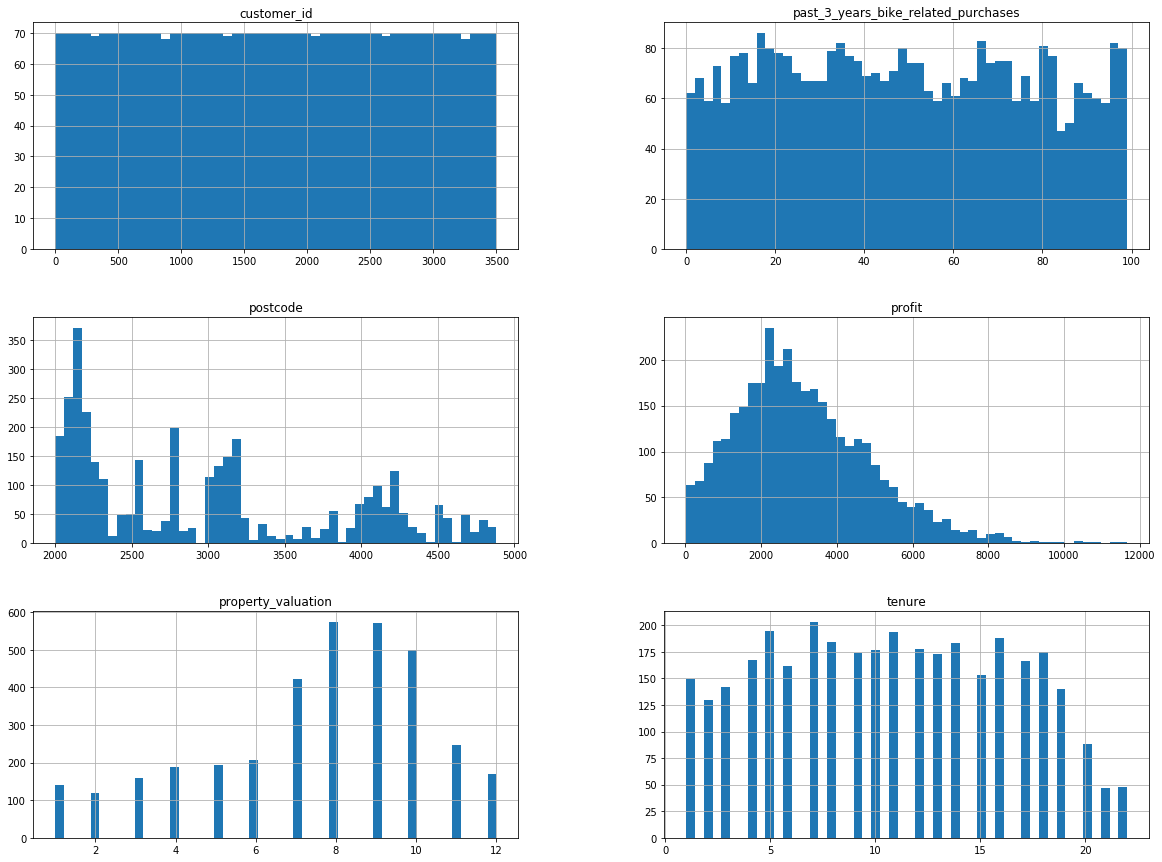

In [244]:

customers_that_bought.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# before further EDA, lets keep a portion as test set
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 234
train, test = train_test_split(customers_that_bought, test_size=test_size, random_state=seed)
test.to_csv('testset.csv', index=False)
train.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
1586,1587,Kevan,Laminman,Male,17,1986-08-16,Software Test Engineer III,Entertainment,Affluent Customer,N,Yes,12.0,54 Veith Drive,2073,NSW,Australia,12,635.72
1068,1069,Reese,Titterington,Male,85,1976-04-15,Web Designer I,Telecommunications,Mass Customer,N,No,15.0,19386 Burrows Way,2229,NSW,Australia,10,1982.69
949,950,Bret,Ivakhnov,U,24,NaT,Recruiter,IT,High Net Worth,N,Yes,NaN,0 Menomonie Avenue,3177,VIC,Australia,6,3609.09
1635,1636,Karly,Ackenhead,Female,65,1980-05-12,Chemical Engineer,Manufacturing,High Net Worth,N,Yes,5.0,5 Moland Court,4551,QLD,Australia,6,3274.29
2901,2902,Stacia,Gritsaev,Female,57,1974-12-31,Human Resources Manager,Financial Services,Mass Customer,N,Yes,7.0,72850 Lotheville Junction,2480,NSW,Australia,4,899.76


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


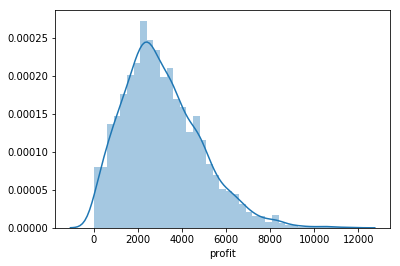

In [255]:
sns.distplot(customers_that_bought['profit'])

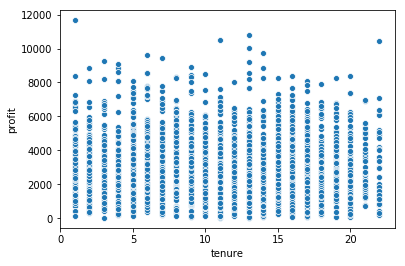

In [256]:
sns.scatterplot(x='tenure', y='profit', data=train)

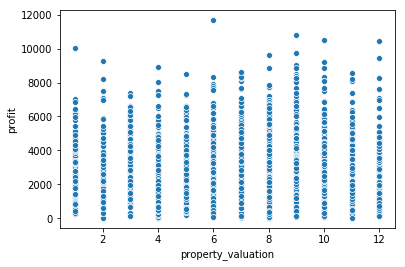

In [257]:
sns.scatterplot(x='property_valuation', y='profit', data=train)

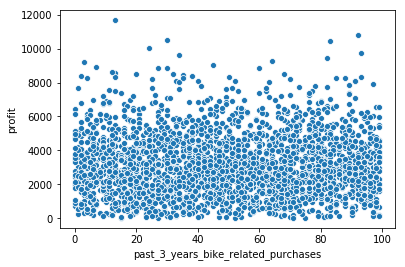

In [254]:
sns.scatterplot(x='past_3_years_bike_related_purchases', y='profit', data=train)

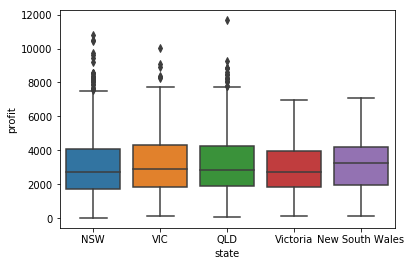

In [253]:
sns.boxplot(x='state', y='profit', data=train)

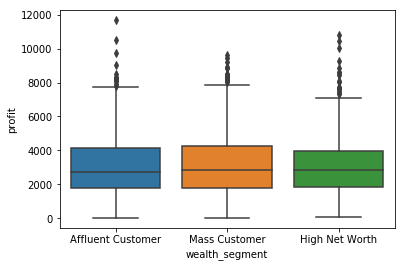

In [263]:
sns.boxplot(x='wealth_segment', y='profit', data=train)

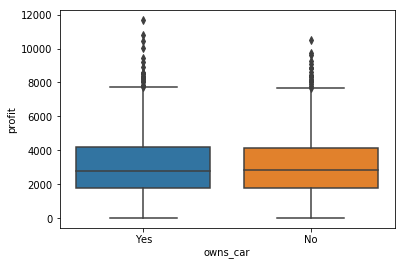

In [264]:
sns.boxplot(x='owns_car', y='profit', data=train)

In [14]:
# create a copy of the train set for initial exploration and model spotchecking
train_copy = train.copy()

In [15]:
# Let's take out variables we apparently won't be needing
keep = ['gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation', 'profit']
train_copy = train_copy.loc[:, keep]
train_copy.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,profit
1586,Male,17,1986-08-16,Entertainment,Affluent Customer,Yes,12.0,NSW,12,635.72
1068,Male,85,1976-04-15,Telecommunications,Mass Customer,No,15.0,NSW,10,1982.69
949,U,24,NaT,IT,High Net Worth,Yes,NaN,VIC,6,3609.09
1635,Female,65,1980-05-12,Manufacturing,High Net Worth,Yes,5.0,QLD,6,3274.29
2901,Female,57,1974-12-31,Financial Services,Mass Customer,Yes,7.0,NSW,4,899.76


In [16]:
# imputing mis-spelled values in gender
train_copy['gender'].replace({'F' : 'Female', 'Femal' : 'Female', 'M' : 'Male'}, inplace=True)
# replace all U and 247 with the mode value (female)
train_copy['gender'].replace({'U' : 'Female', '247' : 'Female'}, inplace=True)
train_copy.gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
# create age variable from DOB
# create age variable out of DOB
train_copy['age'] = train_copy['DOB'].map(lambda x: x.year)
# dividing it by the year 2018 as we assume to be analysing for the year 2018
train_copy['age'] = 2018 - train_copy['age']
train_copy.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,profit,age
1586,Male,17,1986-08-16,Entertainment,Affluent Customer,Yes,12.0,NSW,12,635.72,32.0
1068,Male,85,1976-04-15,Telecommunications,Mass Customer,No,15.0,NSW,10,1982.69,42.0
949,Female,24,NaT,IT,High Net Worth,Yes,NaN,VIC,6,3609.09,NaN
1635,Female,65,1980-05-12,Manufacturing,High Net Worth,Yes,5.0,QLD,6,3274.29,38.0
2901,Female,57,1974-12-31,Financial Services,Mass Customer,Yes,7.0,NSW,4,899.76,44.0


In [21]:
train_copy.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     57
job_industry_category                  441
wealth_segment                           0
owns_car                                 0
tenure                                  57
state                                    0
property_valuation                       0
profit                                   0
age                                     57
dtype: int64

In [22]:
# replaced all NAs in job_industry_category with most occuring category in the variable 
train_copy['job_industry_category'].fillna(train_copy['job_industry_category'].mode()[0],inplace=True)
train_copy['job_industry_category'].value_counts()

Manufacturing         998
Financial Services    546
Health                435
Retail                250
Property              186
IT                    150
Entertainment          96
Argiculture            84
Telecommunications     48
Name: job_industry_category, dtype: int64

In [23]:
# replaced all NAs in tenure with the median of the variable
train_copy['tenure'].fillna(train_copy['tenure'].median(),inplace=True)
train_copy['tenure'].isnull().sum()

0

In [24]:
# replaced NAs in age with the median of the variable
train_copy['age'].fillna(train_copy['age'].median(),inplace=True)

In [25]:
train_copy.isnull().sum()

gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    57
job_industry_category                   0
wealth_segment                          0
owns_car                                0
tenure                                  0
state                                   0
property_valuation                      0
profit                                  0
age                                     0
dtype: int64

In [26]:
# drop DOB variable 
train_copy.drop(['DOB'], axis=1, inplace=True)
train_copy.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,profit,age
1586,Male,17,Entertainment,Affluent Customer,Yes,12.0,NSW,12,635.72,32.0
1068,Male,85,Telecommunications,Mass Customer,No,15.0,NSW,10,1982.69,42.0
949,Female,24,IT,High Net Worth,Yes,11.0,VIC,6,3609.09,41.0
1635,Female,65,Manufacturing,High Net Worth,Yes,5.0,QLD,6,3274.29,38.0
2901,Female,57,Financial Services,Mass Customer,Yes,7.0,NSW,4,899.76,44.0


In [27]:
train_copy.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
profit                                 0
age                                    0
dtype: int64

In [87]:
# subset X and Y from the train set
train_copyX = train_copy.drop(['profit'], axis=1)
train_copyY = train_copy['profit']

##### Pipeline for Numerical Variables
1. StandardScaler for feature scaling

##### Pipeline for Categorical Variables
1. OneHotEncoder for creating dummy variables

In [29]:
train_copyX.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
1586,Male,17,Entertainment,Affluent Customer,Yes,12.0,NSW,12,32.0
1068,Male,85,Telecommunications,Mass Customer,No,15.0,NSW,10,42.0
949,Female,24,IT,High Net Worth,Yes,11.0,VIC,6,41.0
1635,Female,65,Manufacturing,High Net Worth,Yes,5.0,QLD,6,38.0
2901,Female,57,Financial Services,Mass Customer,Yes,7.0,NSW,4,44.0


In [30]:
# subset numerical variables from categorical ones
# split out numerical predictors from train_copyX
numFeats = ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age'] #numFeats means numerical feature columns
trainNum = train_copyX.loc[:, numFeats]
trainNum.head() # trainNum means trainset numerical predictors

,past_3_years_bike_related_purchases,tenure,property_valuation,age
1586,17,12.0,12,32.0
1068,85,15.0,10,42.0
949,24,11.0,6,41.0
1635,65,5.0,6,38.0
2901,57,7.0,4,44.0


In [31]:
# split out categorical predictors from trainX
catFeats = train_copyX.columns.drop(numFeats) # catFeats means categorical f
trainCat = train_copyX.loc[:, catFeats]
trainCat.head() # trainCat means train set's categorical predictors

,gender,job_industry_category,wealth_segment,owns_car,state
1586,Male,Entertainment,Affluent Customer,Yes,NSW
1068,Male,Telecommunications,Mass Customer,No,NSW
949,Female,IT,High Net Worth,Yes,VIC
1635,Female,Manufacturing,High Net Worth,Yes,QLD
2901,Female,Financial Services,Mass Customer,Yes,NSW


In [32]:
# Pipeline for numerical predictors

# import relevant libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# instantiate Pipeline
numPipe = Pipeline([('Scaler', StandardScaler())])

In [33]:
# Pipeline for categorical predictors

# import relevant library
from sklearn.preprocessing import OneHotEncoder

# instantiate Pipeline
catPipe = Pipeline([('OneHot', OneHotEncoder())])

In [34]:
# Combine the two pipelines using Sklearn's ColumnTransformer

from sklearn.compose import ColumnTransformer

fullPipe = ColumnTransformer([('Nums', numPipe, numFeats), ('Cats', catPipe, catFeats)])

In [35]:
# run pipeline on trainX set
fullPipe.fit(train_copyX, train_copyY)
trainXPrep = fullPipe.transform(train_copyX) # trainXPrep means prepared train predictors
trainXPrep

array([[-1.12447119,  0.23523336,  1.59334442, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.27116821,  0.77054579,  0.88516317, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87786125,  0.05679589, -0.53119932, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.88363831, -0.83539149,  0.53107255, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45510135, -1.37070391,  0.17698192, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20849142, -0.65695401,  0.88516317, ...,  0.        ,
         1.        ,  0.        ]])

##### Spot Check Algorithms

In [46]:
# import relevant libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define the pipeline
models = []

models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model, trainXPrep, train_copyY, cv=kfold, scoring=scoring, n_jobs=-1)
    
    # output to evaluate results
    rmse = np.sqrt(-cv_results)
    
    # append each model results into empty lists created
    results.append(rmse)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, rmse.mean(), rmse.std())
    print(see_results)

LR: 1778.680112 (90.661673)
Lasso: 1777.419083 (90.671204)
EN: 1770.377063 (90.292928)
KNN: 1928.647197 (91.860658)
SVR: 1787.038060 (104.119620)
CART: 2560.831123 (130.233681)


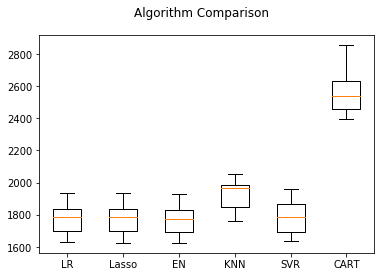

In [47]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
# Try some Ensemble Techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


e_models = []

e_models.append(('RFR', RandomForestRegressor()))
e_models.append(('GBR', GradientBoostingRegressor()))
e_models.append(('ABR', AdaBoostRegressor()))
e_models.append(('ETR', ExtraTreesRegressor()))

# empty lists to store model names and results
e_results = []
e_names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

for e_name, e_model in e_models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    e_cv_results = cross_val_score(e_model, trainXPrep, train_copyY, cv=kfold, scoring=scoring)
    
    # output to evaluate results
    e_rmse = np.sqrt(-e_cv_results)
    
    # append each model results into empty lists created
    e_results.append(e_rmse)
    e_names.append(e_name)
    
    see_e_results = '%s: %f (%f)' % (e_name, e_rmse.mean(), e_rmse.std())
    print(see_e_results)

RFR: 1818.477185 (93.068368)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBR: 1796.846144 (85.194607)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ABR: 1888.024545 (46.223595)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ETR: 1890.683283 (77.318544)


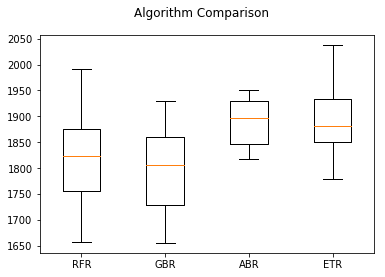

In [49]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(e_results)
ax.set_xticklabels(e_names)
plt.show()

In [50]:
### fine tune ElasticNet with GridSearchCV

# import relevant libraries
from sklearn.model_selection import GridSearchCV

# set parameters
param = {"max_iter": [500, 1000, 1500, 2000],
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          "l1_ratio": np.arange(0.0, 1.0, 0.1)}

# instantiate model
model = ElasticNet()

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

# gridsearchCV
kfold = KFold(n_splits=num_fold, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param, scoring=scoring, cv=kfold)
grid_result = grid.fit(trainXPrep, train_copyY)

# print result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3909825201.961433, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3887710364.247038, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: Co

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3963347994.350238, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3877008710.1054235, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3909824119.0072255, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3949988014.652906, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3862179953.072421, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3889144764.469365, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3949547723.06886, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3861644711.722712, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3889965534.15851, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: 

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3780897803.5302715, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3873246552.845825, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3777533396.124787, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarnin

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3858291542.70609, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3809085893.2317896, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3897841778.520211, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3889484699.540656, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3826308699.564095, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3912792056.044321, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3880084360.3919945, tolerance: 789203.0057133364
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3902254866.279493, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3833834882.206026, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarnin

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3683024250.5481462, tolerance: 770338.6494172629
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3790241448.8411074, tolerance: 789203.0057133364
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3703051572.285128, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3813237788.581618, tolerance: 787659.8610373337
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3711836447.3621197, tolerance: 770338.6494172629
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3816770095.5554557, tolerance: 789203.0057133364
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3839323372.936526, tolerance: 796694.7976688711
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3816115459.955391, tolerance: 787659.8610373337
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3714145585.776076, tolerance: 770338.6494172629
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3683609666.2697186, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3805211059.4313045, tolerance: 796694.7976688711
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3791569948.8274384, tolerance: 787659.8610373337
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarn

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3739256442.3055124, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3544277085.14433, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3709075372.94483, tolerance: 796694.7976688711
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3512090446.0090594, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3650894600.8921494, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3365890592.9931726, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarn

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3910029573.480321, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3887847838.3312454, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3966027022.274829, tolerance: 796694.7976688711
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarnin

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3877230515.7906494, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3135399331.0506444, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2572407870.4252386, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarn

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2845256620.496111, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2418377278.2753687, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1468544970.0535798, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2154128319.121061, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6790472.898643494, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854261.8106489182, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3817040.499028206, tolerance: 787659.8610373337
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3335245448.558102, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2523511417.6923714, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarnin

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1508964.19956398, tolerance: 787659.8610373337
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3451859959.706279, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984169710.0272474, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53505249.9560051, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45543765.78854561, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042655.306697845, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2306076358.465822, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1374635524.2145462, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137830778.14190102, tolerance: 780479.3260976381
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3965757683.520651, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3878958149.141508, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3911676199.745622, tolerance: 786127.7698490747
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3887204744.8568916, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3965757683.5206513, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3878958149.1415033, tolerance: 779244.8756725352
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarn

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3991489845.3898554, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3892794636.851537, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3972161627.3660593, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3998877064.0185747, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3899701565.544479, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3979449453.7968287, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarni

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4002402203.949821, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3902969183.515189, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3982493147.334852, tolerance: 796606.7249826576
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3944849966.730853, tolerance: 789203.0057133364
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4002402203.949821, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3902969183.515189, tolerance: 780717.6734444022
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3851641877.973986, tolerance: 770338.6494172629
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3945890090.9189334, tolerance: 789203.0057133364
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4002975458.38987, tolerance: 800608.7629562651
  positive)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning

Best: -3133167.970265 using {'alpha': 100, 'l1_ratio': 0.8, 'max_iter': 500}
-3171867.185190 (321592.639789) with: {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 500}
-3171866.440525 (321591.989727) with: {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 1000}
-3171866.069825 (321591.763027) with: {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 1500}
-3171865.866912 (321591.678732) with: {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 2000}
-3171872.749310 (321591.796125) with: {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 500}
-3171872.080303 (321591.183100) with: {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 1000}
-3171871.732646 (321590.947517) with: {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 1500}
-3171871.530306 (321590.852543) with: {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 2000}
-3171878.302769 (321590.937939) with: {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 500}
-3171877.711640 (321590.375404) with: {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 1000}
-3171877.391245 

#### get a copy of the test set and preprocess a part of it for further evaluation of our model
~ I also created a new copy of the train set to train the model with its best hyperparameter combo.

In [30]:
test_cop = test.copy()
test_cop.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
3335,3336,Konstantine,Terne,Male,47,1979-01-10,Research Assistant IV,Manufacturing,Mass Customer,N,Yes,8.0,322 Namekagon Trail,2107,NSW,Australia,11,5824.48
2181,2182,Symon,Minchin,Male,47,1967-04-23,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,16.0,53221 Namekagon Parkway,2557,NSW,Australia,9,4766.82
3236,3237,Astrid,Sumnall,Female,94,1964-08-15,Assistant Manager,Manufacturing,Mass Customer,N,No,13.0,7574 Onsgard Drive,4011,QLD,Australia,7,3919.85
2222,2223,Sarita,Georgiev,Female,38,1981-01-29,Professor,Health,Mass Customer,N,No,12.0,60650 Mcbride Point,3918,VIC,Australia,7,3538.42
1170,1171,Ilise,Solloway,Female,32,1971-08-15,Human Resources Manager,NaN,Affluent Customer,N,Yes,8.0,79 Grasskamp Center,2170,NSW,Australia,9,3879.32


In [31]:
test_copX = test_cop.drop(['profit'], axis=1)
test_copY = test_cop['profit']
test_copX.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 3335 to 1073
Data columns (total 17 columns):
customer_id                            699 non-null int64
first_name                             699 non-null object
last_name                              676 non-null object
gender                                 699 non-null object
past_3_years_bike_related_purchases    699 non-null int64
DOB                                    680 non-null datetime64[ns]
job_title                              619 non-null object
job_industry_category                  579 non-null object
wealth_segment                         699 non-null object
deceased_indicator                     699 non-null object
owns_car                               699 non-null object
tenure                                 680 non-null float64
address                                699 non-null object
postcode                               699 non-null int64
state                                  699 non-null object


In [32]:
some_test_copX = test_copX.iloc[0:100, :]
some_test_copY = test_copY.iloc[0:100]

In [33]:
# a new copy of train set
train_co = train.copy()

In [34]:
train_coX = train_co.drop(['profit'], axis=1)
train_coY = train_co['profit']

In [35]:
#function for creating age variable from DOB

def create_age(data=None):
    data['age'] = data['DOB'].map(lambda x: x.year)
    
    data['age'] = 2015 - data['age']
    
    return data

In [36]:
create_age(data=train_coX)
train_coX.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
1586,1587,Kevan,Laminman,Male,17,1986-08-16,Software Test Engineer III,Entertainment,Affluent Customer,N,Yes,12.0,54 Veith Drive,2073,NSW,Australia,12,29.0
1068,1069,Reese,Titterington,Male,85,1976-04-15,Web Designer I,Telecommunications,Mass Customer,N,No,15.0,19386 Burrows Way,2229,NSW,Australia,10,39.0
949,950,Bret,Ivakhnov,U,24,NaT,Recruiter,IT,High Net Worth,N,Yes,NaN,0 Menomonie Avenue,3177,VIC,Australia,6,NaN
1635,1636,Karly,Ackenhead,Female,65,1980-05-12,Chemical Engineer,Manufacturing,High Net Worth,N,Yes,5.0,5 Moland Court,4551,QLD,Australia,6,35.0
2901,2902,Stacia,Gritsaev,Female,57,1974-12-31,Human Resources Manager,Financial Services,Mass Customer,N,Yes,7.0,72850 Lotheville Junction,2480,NSW,Australia,4,41.0


In [37]:
create_age(data=some_test_copX)
some_test_copX.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
3335,3336,Konstantine,Terne,Male,47,1979-01-10,Research Assistant IV,Manufacturing,Mass Customer,N,Yes,8.0,322 Namekagon Trail,2107,NSW,Australia,11,36.0
2181,2182,Symon,Minchin,Male,47,1967-04-23,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,16.0,53221 Namekagon Parkway,2557,NSW,Australia,9,48.0
3236,3237,Astrid,Sumnall,Female,94,1964-08-15,Assistant Manager,Manufacturing,Mass Customer,N,No,13.0,7574 Onsgard Drive,4011,QLD,Australia,7,51.0
2222,2223,Sarita,Georgiev,Female,38,1981-01-29,Professor,Health,Mass Customer,N,No,12.0,60650 Mcbride Point,3918,VIC,Australia,7,34.0
1170,1171,Ilise,Solloway,Female,32,1971-08-15,Human Resources Manager,NaN,Affluent Customer,N,Yes,8.0,79 Grasskamp Center,2170,NSW,Australia,9,44.0


In [38]:
# function to correct misspelled gender names
def correct_misspelled_gender(data=None):
    data['gender'].replace({'U' : 'Female', '247' : 'Female',
                              'F' : 'Female', 'Femal' : 'Female', 'M' : 'Male'}, inplace=True)
    return data

In [39]:
correct_misspelled_gender(data=train_coX)
train_coX['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
correct_misspelled_gender(data=some_test_copX)
some_test_copX['gender'].unique()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array(['Male', 'Female'], dtype=object)

In [41]:
# function to correct misspelled state names

def correct_misspelled_state(data=None):
    data['state'].replace({'Victoria' : 'VIC', 'New South Wales' : 'NSW'}, inplace=True)
    
    return data

In [42]:
correct_misspelled_state(train_coX)
train_coX.state.unique()

array(['NSW', 'VIC', 'QLD'], dtype=object)

In [43]:
correct_misspelled_state(data=some_test_copX)
set(some_test_copX.state)

{'NSW', 'QLD', 'VIC'}

In [44]:
# convert all category variables' values to discrete numbers      
def discretize_categories(data=None):
    # gender variable
    data['gender'].replace({'Female' : 1, 'Male' : 2}, inplace=True)
    # job industry variable
    data['job_industry_category'].replace({'Entertainment' : 1, 'Telecommunications' : 2,
                                           'IT' : 3, 'Manufacturing' : 4, 'Financial Services' : 5,
                                           'Retail' : 6, 'Health' : 7, 'Property' : 8, 'Argiculture' : 9}, inplace=True)
    
    # state variable
    data['state'].replace({'NSW' : 1, 'VIC' : 2, 'QLD' : 3}, inplace=True)
    
    # wealth segment variable
    data['wealth_segment'].replace({'Affluent Customer' : 1, 'Mass Customer' : 2, 'High Net Worth' : 3}, inplace=True)
    
    # owns a car variable
    data['owns_car'].replace({'Yes' : 1, 'No' : 2}, inplace=True)
    
    return data

In [45]:
discretize_categories(data=train_coX)
train_coX.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
1586,1587,Kevan,Laminman,2,17,1986-08-16,Software Test Engineer III,1.0,1,N,1,12.0,54 Veith Drive,2073,1,Australia,12,29.0
1068,1069,Reese,Titterington,2,85,1976-04-15,Web Designer I,2.0,2,N,2,15.0,19386 Burrows Way,2229,1,Australia,10,39.0
949,950,Bret,Ivakhnov,1,24,NaT,Recruiter,3.0,3,N,1,NaN,0 Menomonie Avenue,3177,2,Australia,6,NaN
1635,1636,Karly,Ackenhead,1,65,1980-05-12,Chemical Engineer,4.0,3,N,1,5.0,5 Moland Court,4551,3,Australia,6,35.0
2901,2902,Stacia,Gritsaev,1,57,1974-12-31,Human Resources Manager,5.0,2,N,1,7.0,72850 Lotheville Junction,2480,1,Australia,4,41.0


In [46]:
discretize_categories(data=some_test_copX)
some_test_copX.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
3335,3336,Konstantine,Terne,2,47,1979-01-10,Research Assistant IV,4.0,2,N,1,8.0,322 Namekagon Trail,2107,1,Australia,11,36.0
2181,2182,Symon,Minchin,2,47,1967-04-23,Assistant Media Planner,1.0,3,N,1,16.0,53221 Namekagon Parkway,2557,1,Australia,9,48.0
3236,3237,Astrid,Sumnall,1,94,1964-08-15,Assistant Manager,4.0,2,N,2,13.0,7574 Onsgard Drive,4011,3,Australia,7,51.0
2222,2223,Sarita,Georgiev,1,38,1981-01-29,Professor,7.0,2,N,2,12.0,60650 Mcbride Point,3918,2,Australia,7,34.0
1170,1171,Ilise,Solloway,1,32,1971-08-15,Human Resources Manager,NaN,1,N,1,8.0,79 Grasskamp Center,2170,1,Australia,9,44.0


In [47]:
# function to drop irrelevant variables

def drop_irrelevant_variables(data=None):
    data.drop(['customer_id', 'first_name', 'last_name',
               'DOB','job_title', 'deceased_indicator', 'address', 'postcode', 'country'],
              axis=1, inplace=True)
    
    return data

In [48]:
drop_irrelevant_variables(data=train_coX)
train_coX.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
1586,2,17,1.0,1,1,12.0,1,12,29.0
1068,2,85,2.0,2,2,15.0,1,10,39.0
949,1,24,3.0,3,1,NaN,2,6,NaN
1635,1,65,4.0,3,1,5.0,3,6,35.0
2901,1,57,5.0,2,1,7.0,1,4,41.0


In [49]:
drop_irrelevant_variables(data=some_test_copX)
some_test_copX.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
3335,2,47,4.0,2,1,8.0,1,11,36.0
2181,2,47,1.0,3,1,16.0,1,9,48.0
3236,1,94,4.0,2,2,13.0,3,7,51.0
2222,1,38,7.0,2,2,12.0,2,7,34.0
1170,1,32,NaN,1,1,8.0,1,9,44.0


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def pipeliner():
    num_feats = ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age']
    cat_feats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']
    
    num_pipe = Pipeline([('Imputer', SimpleImputer(strategy='mean')), ('Scaler', StandardScaler())])
    cat_pipe = Pipeline([('Imputer', SimpleImputer(strategy='most_frequent')), ('Encoder', OneHotEncoder())])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_feats), ('cats', cat_pipe, cat_feats)])
    
    return full_pipe

In [62]:
pipeliner = pipeliner()
train_cop_preprocessed = pipeliner.fit_transform(train_coX)
train_cop_preprocessed

array([[-1.12447119,  0.23642456,  1.59334442, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.27116821,  0.77175497,  0.88516317, ...,  1.        ,
         0.        ,  0.        ],
       [-0.87786125,  0.        , -0.53119932, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.88363831, -0.83423627,  0.53107255, ...,  1.        ,
         0.        ,  0.        ],
       [-0.45510135, -1.36956669,  0.17698192, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20849142, -0.6557928 ,  0.88516317, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
test_cop_preprocessed = pipeliner.transform(some_test_copX)
test_cop_preprocessed

array([[-0.06757145, -0.47734933,  1.23925379, ...,  1.        ,
         0.        ,  0.        ],
       [-0.06757145,  0.95019844,  0.53107255, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.58823813,  0.41486803, -0.1771087 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.45510135, -0.12046239, -1.5934712 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.23016116, -0.6557928 , -0.53119932, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48254816, -0.6557928 ,  0.88516317, ...,  1.        ,
         0.        ,  0.        ]])

In [74]:
# retrain the model and make predictions on some test data
model = ElasticNet(alpha = 100, l1_ratio=0.8, max_iter=2000)
model.fit(train_cop_preprocessed, train_coY)
predictions = model.predict(test_cop_preprocessed)

In [75]:
#some_test_copY

mse = mean_squared_error(some_test_copY, predictions)
rmse = np.sqrt(mse)

print('mse:', mse, 'rmse:', rmse)

mse: 1847229.33739917 rmse: 1359.1281534127568


In [76]:
predictions

array([3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464017,
       3081.95464017, 3081.95464017, 3081.95464017, 3081.95464

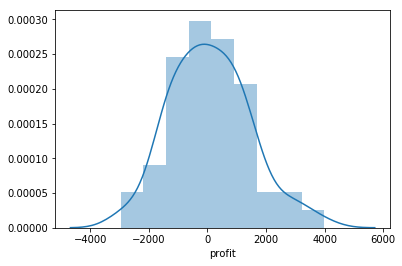

In [119]:
# plotting the residual
sns.distplot((some_test_copY - predictions))